In [81]:
import os 
import sys 
sys.path.append('..')

from mmdet.apis import init_detector, inference_detector
from mmdet.utils import register_all_modules
from mmdet.registry import VISUALIZERS
import mmcv

from datasets import *

In [82]:
# download the checkpoint demo
# !mim download mmdet --config rtmdet_tiny_8xb32-300e_coco --dest ./checkpoints
config_file = r'\\172.16.113.151\UOS-SSaS Dropbox\05. Data\03. Checkpoints\2000. BKim Thesis\cascade-mask-rcnn_x101-64x4d_fpn_2x_coco_pure_positive\cascade-mask-rcnn_x101-64x4d_fpn_2x_coco_pure_positive.py'
checkpoint_file = r'\\172.16.113.151\UOS-SSaS Dropbox\05. Data\03. Checkpoints\2000. BKim Thesis\cascade-mask-rcnn_x101-64x4d_fpn_2x_coco_pure_positive\epoch_24.pth'

In [83]:
#Register all modules in mmdet into the registries
register_all_modules()
# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')  # or device='cpu'

Loads checkpoint by local backend from path: \\172.16.113.151\UOS-SSaS Dropbox\05. Data\03. Checkpoints\2000. BKim Thesis\cascade-mask-rcnn_x101-64x4d_fpn_2x_coco_pure_positive\epoch_24.pth


In [84]:
# test a single image
path = r'\\172.16.113.151\UOS-SSaS Dropbox\05. Data\02. Training&Test\2000. BKim Thesis\01. Pure Positives\01. Cityscapes\leftImg8bit\test'
img_path = os.path.join(path, 'con_dmg_1591327204__leftImg8bit.png')
img = mmcv.imread( img_path, channel_order='rgb')
result = inference_detector(model, img)

In [85]:
# init the visualizer(execute this block only once)
visualizer = VISUALIZERS.build(model.cfg.visualizer)
# the dataset_meta is loaded from the checkpoint and
# then pass to the model in init_detector
visualizer.dataset_meta = model.dataset_meta

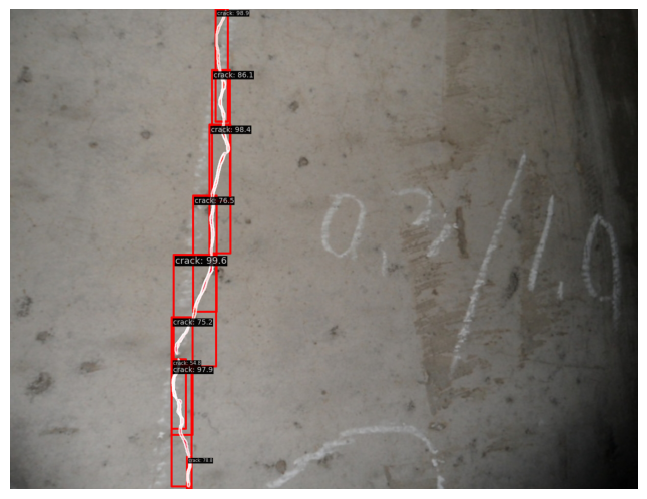

In [86]:
# show the results
visualizer.add_datasample(
    'result',
    img,
    data_sample=result,
    draw_gt=False,
    wait_time=0,
)
visualizer.show()

In [71]:
import numpy as np 
np.sum(result.pred_instances.masks[11].cpu().numpy())

0